# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [3]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
display(heroes_df.head())
display(powers_df.head())

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [4]:
heroes_df.drop(columns=['Unnamed: 0'], inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [5]:
display(heroes_df.describe(), heroes_df.info())
display(powers_df.describe(), powers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Venom III,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


None

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




## In heroes_df:
    #### Idenfity the number of null values for each variable
    #### Identify any placeholder values for each variable
    #### Clean data set appropriately with respect to each variable and entire data set
## In powers_df:
    #### Idenfity the number of null values for each variable
    #### Identify any placeholder values for each variable
    #### Clean data set appropriately with respect to each variable and entire data set

In [6]:
# Identifying null values in heroes_df

# Checking entire dataset against isna.().sum()
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [7]:
# Also, want to check value counts in all columns for placeholder values
for column in heroes_df.columns:
    print(column)
    display(heroes_df[column].value_counts())
    print('\n\n\n')



name


Spider-Man           3
Goliath              3
Firestorm            2
Blizzard             2
Batgirl              2
Namor                2
Nova                 2
Vindicator           2
Angel                2
Captain Marvel       2
Atlas                2
Speedy               2
Atom                 2
Blue Beetle          2
Toxin                2
Black Canary         2
Batman               2
Captain Marvel II    1
MODOK                1
Emma Frost           1
Blob                 1
Electro              1
Wolverine            1
Batwoman V           1
Mystique             1
Cannonball           1
Snowbird             1
Genesis              1
Flash II             1
Cyclops              1
                    ..
Forge                1
Cyborg               1
Brother Voodoo       1
Plastique            1
Black Flash          1
Match                1
Sinestro             1
K-2SO                1
Redeemer III         1
Raphael              1
Harley Quinn         1
Azazel               1
Space Ghost





Gender


Male      505
Female    200
-          29
Name: Gender, dtype: int64





Eye color


blue                       225
-                          172
brown                      126
green                       73
red                         46
black                       23
yellow                      19
white                       17
hazel                        6
grey                         6
purple                       4
gold                         3
amber                        2
yellow (without irises)      2
violet                       2
blue / white                 1
silver                       1
yellow / red                 1
green / blue                 1
white / red                  1
yellow / blue                1
indigo                       1
bown                         1
Name: Eye color, dtype: int64





Race


-                     304
Human                 208
Mutant                 63
God / Eternal          14
Cyborg                 11
Human / Radiation      11
Symbiote                9
Android                 9
Kryptonian              7
Alien                   7
Demon                   6
Alpha                   5
Asgardian               5
Atlantean               5
Cosmic Entity           4
Inhuman                 4
Animal                  4
New God                 3
Human / Altered         3
Eternal                 2
Human-Kree              2
Frost Giant             2
Amazon                  2
Metahuman               2
Demi-God                2
Vampire                 2
Saiyan                  2
Human / Cosmic          2
Rodian                  1
Human-Spartoi           1
                     ... 
Bizarro                 1
Human-Vulcan            1
Flora Colossus          1
Korugaran               1
Planet                  1
Gorilla                 1
Mutant / Clone          1
Human / Clon





Hair color


-                   172
Black               158
Blond                99
Brown                86
No Hair              75
Red                  51
White                23
Auburn               13
Green                 8
Strawberry Blond      7
Grey                  5
Purple                5
Brown / White         4
Silver                4
blond                 3
black                 3
Blue                  3
Orange                2
Yellow                2
Orange / White        1
Brown / Black         1
Magenta               1
Red / White           1
Gold                  1
Brownn                1
Black / Blue          1
Indigo                1
Pink                  1
Red / Grey            1
Red / Orange          1
Name: Hair color, dtype: int64





Height


-99.0     217
 183.0     59
 188.0     51
 178.0     39
 180.0     38
 185.0     35
 175.0     34
 168.0     29
 170.0     26
 165.0     26
 191.0     21
 193.0     21
 198.0     18
 173.0     17
 201.0     11
 196.0     11
 163.0      8
 213.0      7
 203.0      5
 211.0      5
 157.0      5
 244.0      4
 229.0      3
 155.0      3
 218.0      3
 226.0      3
 122.0      2
 206.0      2
 279.0      2
 366.0      2
 137.0      2
 30.5       2
 305.0      2
 61.0       1
 975.0      1
 142.0      1
 287.0      1
 267.0      1
 304.8      1
 701.0      1
 876.0      1
 259.0      1
 15.2       1
 297.0      1
 257.0      1
 62.5       1
 66.0       1
 160.0      1
 140.0      1
 234.0      1
 71.0       1
 79.0       1
 108.0      1
 64.0       1
Name: Height, dtype: int64





Publisher


Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
HarperCollins          6
Star Trek              6
Team Epic TV           5
SyFy                   5
Shueisha               4
Icon Comics            4
IDW Publishing         4
ABC Studios            4
Wildstorm              3
Sony Pictures          2
Universal Studios      1
Hanna-Barbera          1
J. R. R. Tolkien       1
Rebellion              1
South Park             1
Microsoft              1
J. K. Rowling          1
Titan Books            1
Name: Publisher, dtype: int64





Skin color


-                 662
green              21
blue                9
red                 9
white               7
silver              5
grey                5
purple              3
gold                3
pink                2
yellow              2
orange / white      1
black               1
gray                1
red / black         1
blue-white          1
orange              1
Name: Skin color, dtype: int64





Alignment


good       496
bad        207
neutral     24
-            7
Name: Alignment, dtype: int64





Weight


-99.0     237
 79.0      23
 54.0      23
 81.0      22
 90.0      19
 52.0      15
 86.0      15
 59.0      14
 56.0      13
 77.0      13
 61.0      13
 101.0     12
 50.0      12
 88.0      11
 63.0      11
 83.0      10
 95.0      10
 74.0      10
 65.0       9
 72.0       8
 68.0       8
 104.0      8
 135.0      8
 57.0       7
 97.0       7
 99.0       7
 117.0      6
 108.0      6
 55.0       5
 70.0       5
         ... 
 14.0       1
 356.0      1
 105.0      1
 324.0      1
 360.0      1
 236.0      1
 36.0       1
 140.0      1
 128.0      1
 248.0      1
 16.0       1
 45.0       1
 234.0      1
 96.0       1
 82.0       1
 76.0       1
 198.0      1
 116.0      1
 176.0      1
 170.0      1
 47.0       1
 78.0       1
 27.0       1
 25.0       1
 178.0      1
 132.0      1
 38.0       1
 412.0      1
 320.0      1
 855.0      1
Name: Weight, Length: 135, dtype: int64

In [8]:
# Replace -99.0 and ' ' with np.nan
# Replace '-' with unknown

heroes_df.replace(to_replace=[-99.0, ' '], value=np.nan, inplace=True)
heroes_df.replace(to_replace='-', value='Unknown', inplace=True)

In [9]:
# Deciding to replace null 'Publisher' values with the string 'Unknown'
heroes_df.Publisher.fillna('Unknown', inplace=True)

In [10]:
# Check data set
heroes_df.info()
for column in heroes_df.columns:
    print(column)
    display(heroes_df[column].value_counts())
    print('\n\n\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        517 non-null float64
Publisher     734 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        495 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB
name


Spider-Man           3
Goliath              3
Firestorm            2
Blizzard             2
Batgirl              2
Namor                2
Nova                 2
Vindicator           2
Angel                2
Captain Marvel       2
Atlas                2
Speedy               2
Atom                 2
Blue Beetle          2
Toxin                2
Black Canary         2
Batman               2
Captain Marvel II    1
MODOK                1
Emma Frost           1
Blob                 1
Electro              1
Wolverine            1
Batwoman V           1
Mystique             1
Cannonball           1
Snowbird             1
Genesis              1
Flash II             1
Cyclops              1
                    ..
Forge                1
Cyborg               1
Brother Voodoo       1
Plastique            1
Black Flash          1
Match                1
Sinestro             1
K-2SO                1
Redeemer III         1
Raphael              1
Harley Quinn         1
Azazel               1
Space Ghost





Gender


Male       505
Female     200
Unknown     29
Name: Gender, dtype: int64





Eye color


blue                       225
Unknown                    172
brown                      126
green                       73
red                         46
black                       23
yellow                      19
white                       17
hazel                        6
grey                         6
purple                       4
gold                         3
yellow (without irises)      2
amber                        2
violet                       2
bown                         1
green / blue                 1
yellow / red                 1
yellow / blue                1
white / red                  1
indigo                       1
blue / white                 1
silver                       1
Name: Eye color, dtype: int64





Race


Unknown               304
Human                 208
Mutant                 63
God / Eternal          14
Cyborg                 11
Human / Radiation      11
Symbiote                9
Android                 9
Alien                   7
Kryptonian              7
Demon                   6
Alpha                   5
Asgardian               5
Atlantean               5
Animal                  4
Inhuman                 4
Cosmic Entity           4
Human / Altered         3
New God                 3
Metahuman               2
Saiyan                  2
Human-Kree              2
Human / Cosmic          2
Eternal                 2
Frost Giant             2
Amazon                  2
Vampire                 2
Demi-God                2
Bizarro                 1
Gorilla                 1
                     ... 
Rodian                  1
Human-Vulcan            1
Planet                  1
Korugaran               1
Human-Spartoi           1
Human-Vuldarian         1
Mutant / Clone          1
Human / Clon





Hair color


Unknown             172
Black               158
Blond                99
Brown                86
No Hair              75
Red                  51
White                23
Auburn               13
Green                 8
Strawberry Blond      7
Grey                  5
Purple                5
Brown / White         4
Silver                4
black                 3
blond                 3
Blue                  3
Orange                2
Yellow                2
Orange / White        1
Brown / Black         1
Magenta               1
Red / White           1
Gold                  1
Brownn                1
Black / Blue          1
Indigo                1
Pink                  1
Red / Grey            1
Red / Orange          1
Name: Hair color, dtype: int64





Height


183.0    59
188.0    51
178.0    39
180.0    38
185.0    35
175.0    34
168.0    29
170.0    26
165.0    26
191.0    21
193.0    21
198.0    18
173.0    17
196.0    11
201.0    11
163.0     8
213.0     7
203.0     5
211.0     5
157.0     5
244.0     4
229.0     3
155.0     3
218.0     3
226.0     3
122.0     2
30.5      2
206.0     2
305.0     2
137.0     2
279.0     2
366.0     2
234.0     1
297.0     1
267.0     1
304.8     1
701.0     1
61.0      1
876.0     1
259.0     1
15.2      1
287.0     1
71.0      1
257.0     1
66.0      1
160.0     1
140.0     1
64.0      1
142.0     1
62.5      1
108.0     1
79.0      1
975.0     1
Name: Height, dtype: int64





Publisher


Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
Unknown               15
George Lucas          14
Image Comics          14
HarperCollins          6
Star Trek              6
Team Epic TV           5
SyFy                   5
Icon Comics            4
IDW Publishing         4
Shueisha               4
ABC Studios            4
Wildstorm              3
Sony Pictures          2
Universal Studios      1
Hanna-Barbera          1
J. R. R. Tolkien       1
Rebellion              1
South Park             1
Microsoft              1
J. K. Rowling          1
Titan Books            1
Name: Publisher, dtype: int64





Skin color


Unknown           662
green              21
red                 9
blue                9
white               7
silver              5
grey                5
gold                3
purple              3
yellow              2
pink                2
orange / white      1
gray                1
black               1
red / black         1
blue-white          1
orange              1
Name: Skin color, dtype: int64





Alignment


good       496
bad        207
neutral     24
Unknown      7
Name: Alignment, dtype: int64





Weight


54.0     23
79.0     23
81.0     22
90.0     19
52.0     15
86.0     15
59.0     14
77.0     13
56.0     13
61.0     13
101.0    12
50.0     12
63.0     11
88.0     11
95.0     10
74.0     10
83.0     10
65.0      9
104.0     8
68.0      8
72.0      8
135.0     8
57.0      7
97.0      7
99.0      7
117.0     6
108.0     6
158.0     5
70.0      5
55.0      5
         ..
356.0     1
360.0     1
82.0      1
234.0     1
236.0     1
36.0      1
140.0     1
128.0     1
248.0     1
125.0     1
115.0     1
268.0     1
16.0      1
45.0      1
76.0      1
116.0     1
198.0     1
170.0     1
176.0     1
78.0      1
27.0      1
47.0      1
178.0     1
132.0     1
25.0      1
412.0     1
38.0      1
96.0      1
320.0     1
855.0     1
Name: Weight, Length: 134, dtype: int64

In [11]:
# Now, identifying null values in powers_df
powers_df.isna().sum()

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
Cold Resistance          0
Durability               0
Stealth                  0
Energy Absorption        0
Flight                   0
Danger Sense             0
Underwater breathing     0
Marksmanship             0
Weapons Master           0
Power Augmentation       0
Animal Attributes        0
Longevity                0
Intelligence             0
Super Strength           0
Cryokinesis              0
Telepathy                0
Energy Armor             0
Energy Blasts            0
Duplication              0
Size Changing            0
Density Control          0
Stamina                  0
Astral Travel            0
Audio Control            0
Dexterity                0
                        ..
Intuitive aptitude       0
Vision - Microscopic     0
Melting                  0
Wind Control             0
Super Breath             0
Wallcrawling             0
V

In [12]:
# Also, want to check value counts in all columns for placeholder values
for column in powers_df.columns:
    print(column)
    display(powers_df[column].value_counts())
    print('\n\n\n')

hero_names


Venom III           1
Venom               1
Firelord            1
Chamber             1
Enchantress         1
Emma Frost          1
Captain Epic        1
Mach-IV             1
Mystique            1
Flash II            1
Cyclops             1
Annihilus           1
Punisher            1
Deadman             1
Booster Gold        1
Ammo                1
Batgirl             1
Namor               1
Morlun              1
Watcher             1
Crimson Crusader    1
Ando Masahashi      1
Doctor Octopus      1
Juggernaut          1
Genesis             1
Cannonball          1
Electro             1
Cy-Gor              1
Ozymandias          1
Abin Sur            1
                   ..
Forge               1
Cyborg              1
Brother Voodoo      1
Plastique           1
Black Flash         1
Match               1
Boom-Boom           1
Aquababy            1
Kid Flash           1
Isis                1
K-2SO               1
Sunspot             1
Tempest             1
Space Ghost         1
Thunderstr





Agility


False    425
True     242
Name: Agility, dtype: int64





Accelerated Healing


False    489
True     178
Name: Accelerated Healing, dtype: int64





Lantern Power Ring


False    656
True      11
Name: Lantern Power Ring, dtype: int64





Dimensional Awareness


False    642
True      25
Name: Dimensional Awareness, dtype: int64





Cold Resistance


False    620
True      47
Name: Cold Resistance, dtype: int64





Durability


False    410
True     257
Name: Durability, dtype: int64





Stealth


False    541
True     126
Name: Stealth, dtype: int64





Energy Absorption


False    590
True      77
Name: Energy Absorption, dtype: int64





Flight


False    455
True     212
Name: Flight, dtype: int64





Danger Sense


False    637
True      30
Name: Danger Sense, dtype: int64





Underwater breathing


False    646
True      21
Name: Underwater breathing, dtype: int64





Marksmanship


False    548
True     119
Name: Marksmanship, dtype: int64





Weapons Master


False    562
True     105
Name: Weapons Master, dtype: int64





Power Augmentation


False    659
True       8
Name: Power Augmentation, dtype: int64





Animal Attributes


False    642
True      25
Name: Animal Attributes, dtype: int64





Longevity


False    554
True     113
Name: Longevity, dtype: int64





Intelligence


False    509
True     158
Name: Intelligence, dtype: int64





Super Strength


True     360
False    307
Name: Super Strength, dtype: int64





Cryokinesis


False    648
True      19
Name: Cryokinesis, dtype: int64





Telepathy


False    575
True      92
Name: Telepathy, dtype: int64





Energy Armor


False    659
True       8
Name: Energy Armor, dtype: int64





Energy Blasts


False    520
True     147
Name: Energy Blasts, dtype: int64





Duplication


False    651
True      16
Name: Duplication, dtype: int64





Size Changing


False    612
True      55
Name: Size Changing, dtype: int64





Density Control


False    652
True      15
Name: Density Control, dtype: int64





Stamina


False    378
True     289
Name: Stamina, dtype: int64





Astral Travel


False    663
True       4
Name: Astral Travel, dtype: int64





Audio Control


False    660
True       7
Name: Audio Control, dtype: int64





Dexterity


False    661
True       6
Name: Dexterity, dtype: int64





Omnitrix


False    666
True       1
Name: Omnitrix, dtype: int64





Super Speed


False    418
True     249
Name: Super Speed, dtype: int64





Possession


False    659
True       8
Name: Possession, dtype: int64





Animal Oriented Powers


False    627
True      40
Name: Animal Oriented Powers, dtype: int64





Weapon-based Powers


False    609
True      58
Name: Weapon-based Powers, dtype: int64





Electrokinesis


False    645
True      22
Name: Electrokinesis, dtype: int64





Darkforce Manipulation


False    657
True      10
Name: Darkforce Manipulation, dtype: int64





Death Touch


False    660
True       7
Name: Death Touch, dtype: int64





Teleportation


False    595
True      72
Name: Teleportation, dtype: int64





Enhanced Senses


False    578
True      89
Name: Enhanced Senses, dtype: int64





Telekinesis


False    606
True      61
Name: Telekinesis, dtype: int64





Energy Beams


False    625
True      42
Name: Energy Beams, dtype: int64





Magic


False    623
True      44
Name: Magic, dtype: int64





Hyperkinesis


False    666
True       1
Name: Hyperkinesis, dtype: int64





Jump


False    602
True      65
Name: Jump, dtype: int64





Clairvoyance


False    663
True       4
Name: Clairvoyance, dtype: int64





Dimensional Travel


False    644
True      23
Name: Dimensional Travel, dtype: int64





Power Sense


False    664
True       3
Name: Power Sense, dtype: int64





Shapeshifting


False    601
True      66
Name: Shapeshifting, dtype: int64





Peak Human Condition


False    637
True      30
Name: Peak Human Condition, dtype: int64





Immortality


False    598
True      69
Name: Immortality, dtype: int64





Camouflage


False    646
True      21
Name: Camouflage, dtype: int64





Element Control


False    659
True       8
Name: Element Control, dtype: int64





Phasing


False    636
True      31
Name: Phasing, dtype: int64





Astral Projection


False    638
True      29
Name: Astral Projection, dtype: int64





Electrical Transport


False    666
True       1
Name: Electrical Transport, dtype: int64





Fire Control


False    635
True      32
Name: Fire Control, dtype: int64





Projection


False    665
True       2
Name: Projection, dtype: int64





Summoning


False    663
True       4
Name: Summoning, dtype: int64





Enhanced Memory


False    642
True      25
Name: Enhanced Memory, dtype: int64





Reflexes


False    503
True     164
Name: Reflexes, dtype: int64





Invulnerability


False    550
True     117
Name: Invulnerability, dtype: int64





Energy Constructs


False    629
True      38
Name: Energy Constructs, dtype: int64





Force Fields


False    581
True      86
Name: Force Fields, dtype: int64





Self-Sustenance


False    630
True      37
Name: Self-Sustenance, dtype: int64





Anti-Gravity


False    666
True       1
Name: Anti-Gravity, dtype: int64





Empathy


False    648
True      19
Name: Empathy, dtype: int64





Power Nullifier


False    663
True       4
Name: Power Nullifier, dtype: int64





Radiation Control


False    660
True       7
Name: Radiation Control, dtype: int64





Psionic Powers


False    618
True      49
Name: Psionic Powers, dtype: int64





Elasticity


False    656
True      11
Name: Elasticity, dtype: int64





Substance Secretion


False    650
True      17
Name: Substance Secretion, dtype: int64





Elemental Transmogrification


False    661
True       6
Name: Elemental Transmogrification, dtype: int64





Technopath/Cyberpath


False    644
True      23
Name: Technopath/Cyberpath, dtype: int64





Photographic Reflexes


False    664
True       3
Name: Photographic Reflexes, dtype: int64





Seismic Power


False    664
True       3
Name: Seismic Power, dtype: int64





Animation


False    662
True       5
Name: Animation, dtype: int64





Precognition


False    645
True      22
Name: Precognition, dtype: int64





Mind Control


False    645
True      22
Name: Mind Control, dtype: int64





Fire Resistance


False    649
True      18
Name: Fire Resistance, dtype: int64





Power Absorption


False    655
True      12
Name: Power Absorption, dtype: int64





Enhanced Hearing


False    595
True      72
Name: Enhanced Hearing, dtype: int64





Nova Force


False    665
True       2
Name: Nova Force, dtype: int64





Insanity


False    662
True       5
Name: Insanity, dtype: int64





Hypnokinesis


False    644
True      23
Name: Hypnokinesis, dtype: int64





Animal Control


False    658
True       9
Name: Animal Control, dtype: int64





Natural Armor


False    631
True      36
Name: Natural Armor, dtype: int64





Intangibility


False    647
True      20
Name: Intangibility, dtype: int64





Enhanced Sight


False    642
True      25
Name: Enhanced Sight, dtype: int64





Molecular Manipulation


False    625
True      42
Name: Molecular Manipulation, dtype: int64





Heat Generation


False    643
True      24
Name: Heat Generation, dtype: int64





Adaptation


False    662
True       5
Name: Adaptation, dtype: int64





Gliding


False    657
True      10
Name: Gliding, dtype: int64





Power Suit


False    634
True      33
Name: Power Suit, dtype: int64





Mind Blast


False    655
True      12
Name: Mind Blast, dtype: int64





Probability Manipulation


False    658
True       9
Name: Probability Manipulation, dtype: int64





Gravity Control


False    651
True      16
Name: Gravity Control, dtype: int64





Regeneration


False    639
True      28
Name: Regeneration, dtype: int64





Light Control


False    652
True      15
Name: Light Control, dtype: int64





Echolocation


False    665
True       2
Name: Echolocation, dtype: int64





Levitation


False    641
True      26
Name: Levitation, dtype: int64





Toxin and Disease Control


False    657
True      10
Name: Toxin and Disease Control, dtype: int64





Banish


False    666
True       1
Name: Banish, dtype: int64





Energy Manipulation


False    615
True      52
Name: Energy Manipulation, dtype: int64





Heat Resistance


False    624
True      43
Name: Heat Resistance, dtype: int64





Natural Weapons


False    609
True      58
Name: Natural Weapons, dtype: int64





Time Travel


False    634
True      33
Name: Time Travel, dtype: int64





Enhanced Smell


False    635
True      32
Name: Enhanced Smell, dtype: int64





Illusions


False    629
True      38
Name: Illusions, dtype: int64





Thirstokinesis


False    666
True       1
Name: Thirstokinesis, dtype: int64





Hair Manipulation


False    666
True       1
Name: Hair Manipulation, dtype: int64





Illumination


False    665
True       2
Name: Illumination, dtype: int64





Omnipotent


False    660
True       7
Name: Omnipotent, dtype: int64





Cloaking


False    660
True       7
Name: Cloaking, dtype: int64





Changing Armor


False    666
True       1
Name: Changing Armor, dtype: int64





Power Cosmic


False    660
True       7
Name: Power Cosmic, dtype: int64





Biokinesis


False    666
True       1
Name: Biokinesis, dtype: int64





Water Control


False    654
True      13
Name: Water Control, dtype: int64





Radiation Immunity


False    657
True      10
Name: Radiation Immunity, dtype: int64





Vision - Telescopic


False    624
True      43
Name: Vision - Telescopic, dtype: int64





Toxin and Disease Resistance


False    619
True      48
Name: Toxin and Disease Resistance, dtype: int64





Spatial Awareness


False    666
True       1
Name: Spatial Awareness, dtype: int64





Energy Resistance


False    660
True       7
Name: Energy Resistance, dtype: int64





Telepathy Resistance


False    634
True      33
Name: Telepathy Resistance, dtype: int64





Molecular Combustion


False    665
True       2
Name: Molecular Combustion, dtype: int64





Omnilingualism


False    646
True      21
Name: Omnilingualism, dtype: int64





Portal Creation


False    663
True       4
Name: Portal Creation, dtype: int64





Magnetism


False    656
True      11
Name: Magnetism, dtype: int64





Mind Control Resistance


False    655
True      12
Name: Mind Control Resistance, dtype: int64





Plant Control


False    659
True       8
Name: Plant Control, dtype: int64





Sonar


False    663
True       4
Name: Sonar, dtype: int64





Sonic Scream


False    661
True       6
Name: Sonic Scream, dtype: int64





Time Manipulation


False    647
True      20
Name: Time Manipulation, dtype: int64





Enhanced Touch


False    660
True       7
Name: Enhanced Touch, dtype: int64





Magic Resistance


False    661
True       6
Name: Magic Resistance, dtype: int64





Invisibility


False    645
True      22
Name: Invisibility, dtype: int64





Sub-Mariner


False    647
True      20
Name: Sub-Mariner, dtype: int64





Radiation Absorption


False    660
True       7
Name: Radiation Absorption, dtype: int64





Intuitive aptitude


False    666
True       1
Name: Intuitive aptitude, dtype: int64





Vision - Microscopic


False    648
True      19
Name: Vision - Microscopic, dtype: int64





Melting


False    665
True       2
Name: Melting, dtype: int64





Wind Control


False    664
True       3
Name: Wind Control, dtype: int64





Super Breath


False    644
True      23
Name: Super Breath, dtype: int64





Wallcrawling


False    633
True      34
Name: Wallcrawling, dtype: int64





Vision - Night


False    633
True      34
Name: Vision - Night, dtype: int64





Vision - Infrared


False    645
True      22
Name: Vision - Infrared, dtype: int64





Grim Reaping


False    664
True       3
Name: Grim Reaping, dtype: int64





Matter Absorption


False    656
True      11
Name: Matter Absorption, dtype: int64





The Force


False    661
True       6
Name: The Force, dtype: int64





Resurrection


False    652
True      15
Name: Resurrection, dtype: int64





Terrakinesis


False    665
True       2
Name: Terrakinesis, dtype: int64





Vision - Heat


False    648
True      19
Name: Vision - Heat, dtype: int64





Vitakinesis


False    665
True       2
Name: Vitakinesis, dtype: int64





Radar Sense


False    661
True       6
Name: Radar Sense, dtype: int64





Qwardian Power Ring


False    665
True       2
Name: Qwardian Power Ring, dtype: int64





Weather Control


False    659
True       8
Name: Weather Control, dtype: int64





Vision - X-Ray


False    644
True      23
Name: Vision - X-Ray, dtype: int64





Vision - Thermal


False    644
True      23
Name: Vision - Thermal, dtype: int64





Web Creation


False    653
True      14
Name: Web Creation, dtype: int64





Reality Warping


False    651
True      16
Name: Reality Warping, dtype: int64





Odin Force


False    665
True       2
Name: Odin Force, dtype: int64





Symbiote Costume


False    658
True       9
Name: Symbiote Costume, dtype: int64





Speed Force


False    666
True       1
Name: Speed Force, dtype: int64





Phoenix Force


False    666
True       1
Name: Phoenix Force, dtype: int64





Molecular Dissipation


False    666
True       1
Name: Molecular Dissipation, dtype: int64





Vision - Cryo


False    665
True       2
Name: Vision - Cryo, dtype: int64





Omnipresent


False    665
True       2
Name: Omnipresent, dtype: int64





Omniscient


False    665
True       2
Name: Omniscient, dtype: int64

### No null/placeholder values present in powers_df, so we will proceed!

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [13]:
# Removing duplicate rows from the heroes_df by name
heroes_df.drop_duplicates(subset='name', inplace=True)
heroes_df.name.value_counts()

Venom III           1
Namor               1
Renata Soliz        1
Blaquesmith         1
Watcher             1
Firelord            1
Chamber             1
Enchantress         1
Emma Frost          1
Blob                1
Wolverine           1
Batwoman V          1
Mystique            1
MODOK               1
Flash II            1
Cyclops             1
Bionic Woman        1
Punisher            1
Deadman             1
Booster Gold        1
Ammo                1
Crimson Crusader    1
Doctor Octopus      1
Ghost Rider         1
Ozymandias          1
Mysterio            1
Junkpile            1
Box III             1
Juggernaut          1
Genesis             1
                   ..
Exodus              1
Goku                1
Lady Bullseye       1
Forge               1
Cyborg              1
Brother Voodoo      1
Plastique           1
Vision              1
Peter Petrelli      1
Green Goblin III    1
Luke Skywalker      1
Groot               1
Thunderbird II      1
Raphael             1
Azazel    

In [14]:
# Here we want to reset the index of each df to the names column for heroes_df
heroes_df.set_index(heroes_df['name']).drop('name',axis=1)

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Unknown,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Unknown,bad,441.0
Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,Unknown,bad,NaN
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,Unknown,bad,122.0
Adam Monroe,Male,blue,Unknown,Blond,NaN,NBC - Heroes,Unknown,good,NaN
Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,Unknown,good,88.0
Agent 13,Female,blue,Unknown,Blond,173.0,Marvel Comics,Unknown,good,61.0


In [15]:
# Here we want to reset the index of each df to the names column for powers_df
powers_df.set_index(powers_df['hero_names']).drop('hero_names',axis=1)

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,False,False,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Adam Monroe,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Adam Strange,False,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [16]:
# Combining heroes_df and powers_df by an 'inner' join, to avoid null values from either data set.
# We have plenty of data to work with, so 'inner' should be fine.

combined_df = heroes_df.join(powers_df, how='inner')
combined_df.info()
combined_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 0 to 666
Columns: 178 entries, name to Omniscient
dtypes: bool(167), float64(2), object(9)
memory usage: 166.9+ KB


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Unknown,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Unknown,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,Unknown,bad,NaN,...,False,False,False,False,False,False,False,False,False,False


## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [17]:
# Create dataframes separated by gender
male_hero_hw_df = combined_df.loc[combined_df.Gender == 'Male']
female_hero_hw_df = combined_df.loc[combined_df.Gender == 'Female']

# Drop NaNs from each df, or else they will break the distplot
male_hero_hw_df.dropna(axis=0, how='any', subset=['Height','Weight'], inplace=True)
female_hero_hw_df.dropna(axis=0, how='any', subset=['Height','Weight'], inplace=True)

# Create distplot helper function
def show_distplot(dataframe, gender, column_name):
    x = dataframe[column_name]
    my_plot = sns.distplot(x, axlabel=f'{gender} {column_name}')
    return my_plot

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    297.000000
mean     194.996633
std       72.085980
min       64.000000
25%      180.000000
50%      185.000000
75%      193.000000
max      975.000000
Name: Height, dtype: float64

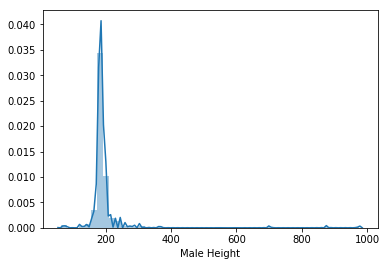

In [18]:
# Male Height
show_distplot(male_hero_hw_df, 'Male', 'Height')
display(male_hero_hw_df.Height.describe())

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    297.000000
mean     127.794613
std      115.644821
min        4.000000
25%       79.000000
50%       90.000000
75%      119.000000
max      900.000000
Name: Weight, dtype: float64

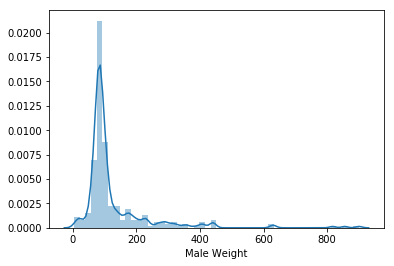

In [19]:
# Male Weight
show_distplot(male_hero_hw_df, 'Male', 'Weight')
display(male_hero_hw_df.Weight.describe())

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    118.000000
mean     172.631356
std       14.125571
min       62.500000
25%      168.000000
50%      171.500000
75%      178.000000
max      218.000000
Name: Height, dtype: float64

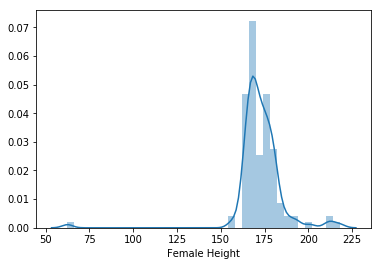

In [20]:
# Female Height
show_distplot(female_hero_hw_df, 'Female', 'Height')
display(female_hero_hw_df.Height.describe())

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    118.000000
mean      76.338983
std       73.898431
min       48.000000
25%       54.000000
50%       58.000000
75%       64.500000
max      630.000000
Name: Weight, dtype: float64

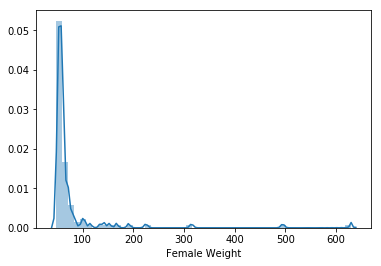

In [21]:
# Female Weight
show_distplot(female_hero_hw_df, 'Female', 'Weight')
display(female_hero_hw_df.Weight.describe())

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
_________________________________________________________________________________________________________________________

#### Male height is a right-skewed distribution, with most observations near the median of 185. The right-skewed nature of the distribution pulls the mean (~195) above the 75% quantile (193) due to some very tall height outliers.

#### Male weight, similar to male height, is a right-skewed distribution, with most observations near the median of 90. The right-skewed nature of the distribution pulls the mean (127.8) above the 75% quantile (119) due to some very heavy weight outliers.

#### Female height is a more normal distribution, with a much lower standard deviation than either male height or male weight, meaning that the average observation is much closer to the mean (172.6) of the distribution. The median (171.5) is very close to the mean in this distribution. At least one extremely low outlier is present at 62.5.

#### Female weight is a very right-skewed distribution, with most observations falling near the median of 58. The right-skewed nature of the distribution pulls the mean (76.3) above the 75% quantile (64.5) due to some very heavy outliers.


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [206]:
# Determining 5 most common powers overall in data set (using combined_df)
list_true_counts = []
list_powers = []
for column in powers_df.columns:
    list_true_counts.append(powers_df[column].value_counts()[1])
    list_powers.append(column)
tuples_powers = list(zip(list_powers, list_true_counts))
sorted_powers = sorted(tuples_powers, key=lambda x: x[1], reverse=True)
print(f'The top 5 most common powers are: {sorted_powers}:')

The top 5 most common powers are: [('Super Strength', 360), ('Stamina', 289), ('Durability', 257), ('Super Speed', 249), ('Agility', 242), ('Flight', 212), ('Accelerated Healing', 178), ('Reflexes', 164), ('Intelligence', 158), ('Energy Blasts', 147), ('Stealth', 126), ('Marksmanship', 119), ('Invulnerability', 117), ('Longevity', 113), ('Weapons Master', 105), ('Telepathy', 92), ('Enhanced Senses', 89), ('Force Fields', 86), ('Energy Absorption', 77), ('Teleportation', 72), ('Enhanced Hearing', 72), ('Immortality', 69), ('Shapeshifting', 66), ('Jump', 65), ('Telekinesis', 61), ('Weapon-based Powers', 58), ('Natural Weapons', 58), ('Size Changing', 55), ('Energy Manipulation', 52), ('Psionic Powers', 49), ('Toxin and Disease Resistance', 48), ('Cold Resistance', 47), ('Magic', 44), ('Heat Resistance', 43), ('Vision - Telescopic', 43), ('Energy Beams', 42), ('Molecular Manipulation', 42), ('Animal Oriented Powers', 40), ('Energy Constructs', 38), ('Illusions', 38), ('Self-Sustenance', 3

In [106]:
# Determining 5 most common powers in the Marvel Universe

# First slice dataframe by Marvel universe
combined_m_df = combined_df.loc[combined_df.Publisher == 'Marvel Comics']

list_marvel_trues = []
list_marvel_powers = []
for column in combined_m_df.columns:
    if combined_m_df[column].dtype == bool:
        list_marvel_trues.append((combined_m_df[column] == True).sum())
        list_marvel_powers.append(column)
marvel_tup_powers = list(zip(list_marvel_powers, list_marvel_trues))
sorted_marvel_powers = sorted(
    marvel_tup_powers, key=lambda x: x[1], reverse=True)
print(
    f'The top 5 most common Marvel universe powers are: {sorted_marvel_powers[0:5]}:')

The top 5 most common Marvel universe powers are: [('Super Strength', 191), ('Stamina', 139), ('Durability', 135), ('Super Speed', 129), ('Agility', 112)]:


In [107]:
# Determining 5 most common powers in the DC Universe

# First slice dataframe by DC universe
combined_dc_df = combined_df.loc[combined_df.Publisher == 'DC Comics']

list_dc_trues = []
list_dc_powers = []
for column in combined_dc_df.columns:
    if combined_dc_df[column].dtype == bool:
        list_dc_trues.append((combined_dc_df[column] == True).sum())
        list_dc_powers.append(column)
dc_tup_powers = list(zip(list_dc_powers, list_dc_trues))
sorted_dc_powers = sorted(
    dc_tup_powers, key=lambda x: x[1], reverse=True)
print(
    f'The top 5 most common DC universe powers are: {sorted_dc_powers[0:5]}:')

The top 5 most common DC universe powers are: [('Super Strength', 93), ('Stamina', 86), ('Agility', 77), ('Durability', 74), ('Super Speed', 71)]:


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
_________________________________________________________________________________________________________________________
#### The Marvel and DC universe top 5 powers are similar: both include Super Strength, Stamina, Durability, Super Speed, and Agility in the top 5. However, while Durability is the 3rd most common power for Marvel, Agility is the 3rd most common power for DC. 

#### The Marvel top 5 powers are identical to the top 5 powers for the entire superheroes dataset, while the DC top 5 powers are ordered differently than the other two.


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
_________________________________________________________________________________________________________________________
## Is there a relationship between a hero's height and weight and their powerset?



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [195]:
# Going to explore that i think may be influenced by height/weight, using scatter plots (height/weight) color coded
# by power
    # Super Strength ?
    # Stealth ?
    # Super Speed ?
    # Durability ?

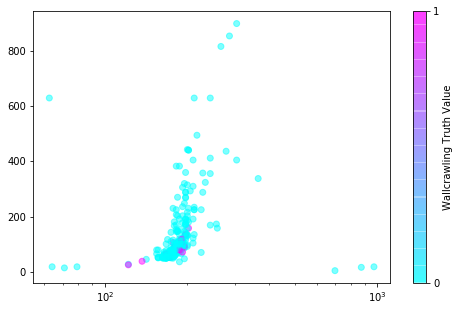

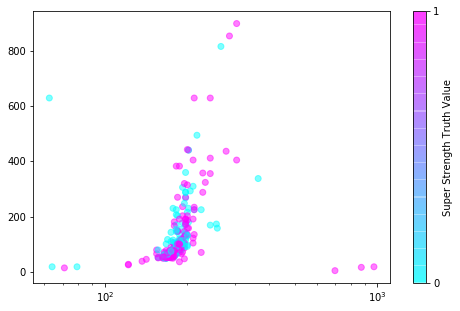

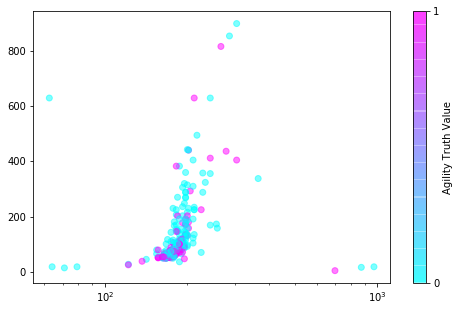

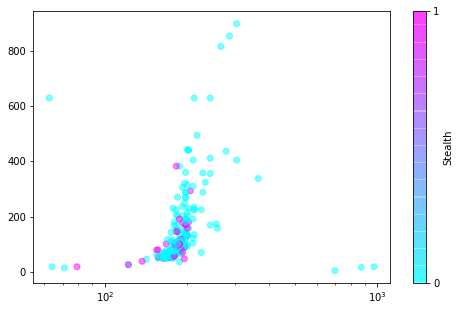

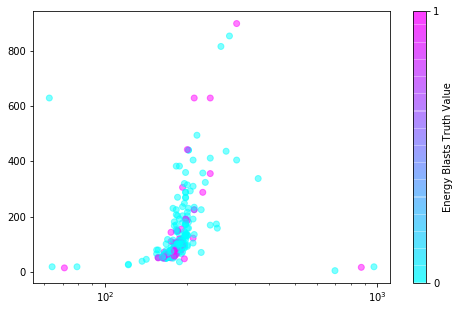

In [264]:
# Plot # 1 : Scotter Plot Height vs Weight colored by Wallcrawling = True vs False
plt.figure(figsize=[8,5])
plt.scatter(combined_df.Height, combined_df.Weight, c=combined_df['Wallcrawling'], cmap = 'cool', alpha=0.5)
plt.xscale('log')
plt.colorbar(ticks=[0,1], label='Wallcrawling Truth Value')
plt.show()
# Plot # 2 : Scotter Plot Height vs Weight colored by Super Strength = True vs False
plt.figure(figsize=[8,5])
plt.scatter(combined_df.Height, combined_df.Weight, c=combined_df['Super Strength'], cmap = 'cool', alpha=0.5)
plt.xscale('log')
plt.colorbar(ticks=[0,1], label='Super Strength Truth Value')
plt.show()
# Plot # 3 : Scotter Plot Height vs Weight colored by Agility = True vs False
plt.figure(figsize=[8,5])
plt.scatter(combined_df.Height, combined_df.Weight, c=combined_df['Agility'], cmap = 'cool', alpha=0.5)
plt.xscale('log')
plt.colorbar(ticks=[0,1], label='Agility Truth Value')
plt.show()
# Plot # 4 : Scotter Plot Height vs Weight colored by Stealth = True vs False
plt.figure(figsize=[8,5])
plt.scatter(combined_df.Height, combined_df.Weight, c=combined_df['Stealth'], cmap = 'cool', alpha=0.5)
plt.xscale('log')
plt.colorbar(ticks=[0,1], label='Stealth')
plt.show()
# Plot # 5 : Scotter Plot Height vs Weight colored by Energy Blasts = True vs False
plt.figure(figsize=[8,5])
plt.scatter(combined_df.Height, combined_df.Weight, c=combined_df['Energy Blasts'], cmap = 'cool', alpha=0.5)
plt.xscale('log')
plt.colorbar(ticks=[0,1], label='Energy Blasts Truth Value')
plt.show()

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data